Structure of this file:
1) Band structure plot. Use this to check different values of J and what $\mu$ should be.
2) List of $\mu$ and J values I should test
3) Numerical integration of lowest order expression 
4) Phase plot somehow? $\mu$ along x, J along y.

# 1: Band structure

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#from numba import njit

In [114]:
# from matplotlib import rc
# rc('text', usetex=True) #uncomment when latex plot is desired
# rc('font', family='serif')

In [115]:
ferromagnetic = False #Sets the ferromagnetic term to 0 when false
enable_SOC = False #Sets SOC to zero when false
altermag = True #Sets tz to 0 when false

In [116]:
# Define the parameters
mu_Fe = -0.25
J = np.array([0,0,1.5])
J_x,J_y,J_z= J[0], J[1], J[2]


In [117]:
#Define hopping parameters
t1= -0.05
t2= 0.7
t3= 0.5
t4= -0.15
t5= -0.4
t6= -0.6
t7= 0.3
t8= 1.7

if ferromagnetic:
    mvals = np.array([0,1,0])
else:
    mvals = np.array([0,0,0])

mxval,myval,mzval = mvals[0], mvals[1], mvals[2]

if enable_SOC:
    socvec = np.array([0.05,0.05,0.17])
else:
    socvec = np.array([0,0,0])

def soc(kx,ky,kz, socvec = socvec): # OBS might be wrong, ligning (2) i Mercès paper er ikke helt klar. Der er nogle lambda jeg ikke ved hvad er
    lol = np.array([
        socvec[0] * np.sin(kz/2) * np.sin(kx/2) * np.cos(ky/2),
        socvec[1] * np.sin(kz/2) * np.sin(ky/2) * np.cos(kx/2),
        socvec[2] * np.cos(kz/2) * np.cos(kx/2) * np.cos(ky/2) * (np.cos(kx) - np.cos(ky))
        ])
    return lol 

# Energy offset / dispersion
def epsilon_0(kx,ky,kz):
    return t1*(np.cos(kx)+np.cos(ky))+ t2*np.cos(kz) + t3*np.cos(kx)*np.cos(ky) + t4*(np.cos(kx) + np.cos(ky))*np.cos(kz) + t5*np.cos(kx)*np.cos(ky)*np.cos(kz) -mu_Fe 

# Define hopping terms as functions of k 
def t_x(kx,ky,kz):
    return t8*np.cos(kx/2)*np.cos(ky/2)*np.cos(kz/2)  

def t_z(kx,ky,kz):
    if altermag:
        return t6*np.sin(kx)*np.sin(ky)+t7*np.sin(kx)*np.sin(ky)*np.cos(kz)
    else:
        return 0  
    

sz = np.matrix([
    [1,0,0,0],
    [0,-1,0,0],
    [0,0,1,0],
    [0,0,0,-1]
])

sx = np.matrix([
    [0,1,0,0],
    [1,0,0,0],
    [0,0,0,1],
    [0,0,1,0]
])

sy = np.matrix([
    [0,-1j,0,0],
    [1j,0,0,0],
    [0,0,0,-1j],
    [0,0,1j,0]
])



def fermi_dirac_dist(eigenenergy, kbT=0.01):
    denominator = np.exp((eigenenergy)/kbT) + 1
    return 1/denominator


def degeneracy(eigenvalues, tolerance=1e-8):
    return [np.isclose(eigenvalues[0], eigenvalues[1], atol=tolerance), np.isclose(eigenvalues[2], eigenvalues[3], atol=tolerance)]
# Tolerance for degeneracy check
degeneracy_tolerance = 1e-8



In [118]:
iterations = 1000
k_x = [np.zeros(iterations),np.linspace(0, np.pi, iterations) , np.linspace(0,np.pi,iterations)[::-1] ,np.zeros(iterations), np.zeros(iterations) , np.linspace(0, np.pi, iterations) , np.linspace(0,np.pi,iterations)[::-1]]
k_y = [np.linspace(0, np.pi, iterations) , np.pi*np.ones(iterations) , np.linspace(0,np.pi,iterations)[::-1] ,np.zeros(iterations), np.linspace(0, np.pi, iterations) , np.pi*np.ones(iterations) , np.linspace(0,np.pi,iterations)[::-1]]
k_z = [np.zeros(iterations),np.zeros(iterations) ,np.zeros(iterations),np.linspace(0,np.pi,iterations), np.pi*np.ones(iterations) , np.pi*np.ones(iterations) , np.pi*np.ones(iterations)]


In [119]:

# Lists to store the colors for each band
colors_band1 = []
colors_band2 = []
colors_band3 = []
colors_band4 = []

I = 1j

#energies
combinedband1 = np.zeros_like(k_x)
combinedband2 = np.zeros_like(k_x)
combinedband3 = np.zeros_like(k_x)
combinedband4 = np.zeros_like(k_x)

#spin in z-direction
combinedsz1=np.zeros_like(k_x)
combinedsz2=np.zeros_like(k_x)
combinedsz3=np.zeros_like(k_x)
combinedsz4=np.zeros_like(k_x)

#spin in x-direction
combinedsx1=np.zeros_like(k_x)
combinedsx2=np.zeros_like(k_x)
combinedsx3=np.zeros_like(k_x)
combinedsx4=np.zeros_like(k_x)

#Spin in y-direction
combinedsy1=np.zeros_like(k_x)
combinedsy2=np.zeros_like(k_x)
combinedsy3=np.zeros_like(k_x)
combinedsy4=np.zeros_like(k_x)

#Fermi dirac function value
combinedfermi1 = np.zeros_like(k_x)
combinedfermi2 = np.zeros_like(k_x)
combinedfermi3 = np.zeros_like(k_x)
combinedfermi4 = np.zeros_like(k_x)


#The big loop
for outer in range(len(k_x)):
    lm = soc(k_x[outer],k_y[outer],k_z[outer])
    #The energies
    eigval1 = np.zeros_like(k_x[0])
    eigval2 = np.zeros_like(k_x[0])
    eigval3 = np.zeros_like(k_x[0])
    eigval4 = np.zeros_like(k_x[0])
    
    #spin z
    sz1 = np.zeros_like(k_x[0])
    sz2 = np.zeros_like(k_x[0])
    sz3 = np.zeros_like(k_x[0])
    sz4 = np.zeros_like(k_x[0])

    #spin x
    sx1 = np.zeros_like(k_x[0])
    sx2 = np.zeros_like(k_x[0])
    sx3 = np.zeros_like(k_x[0])
    sx4 = np.zeros_like(k_x[0])

    #spin y
    sy1 = np.zeros_like(k_x[0])
    sy2 = np.zeros_like(k_x[0])
    sy3 = np.zeros_like(k_x[0])
    sy4 = np.zeros_like(k_x[0])

    #Fermi function values
    fermi1 = np.zeros_like(k_x[0])
    fermi2 = np.zeros_like(k_x[0])
    fermi3 = np.zeros_like(k_x[0])
    fermi4 = np.zeros_like(k_x[0])

    bruh=1
    for inner in range(len(k_x[0])):
        lm_x,lm_y,lm_z = lm[0][inner], lm[1][inner], lm[2][inner]
        tz = t_z(k_x[outer][inner],k_y[outer][inner],k_z[outer][inner])
        tx = t_x(k_x[outer][inner],k_y[outer][inner],k_z[outer][inner])
        
        epsilonmatrix = np.identity(4)*epsilon_0(k_x[outer][inner],k_y[outer][inner],k_z[outer][inner])
        H4x4 = epsilonmatrix+ np.matrix([[tz+J_z+mzval, J_x - I*(J_y+myval)+mxval,tx- I*lm_z,-I*lm_x-lm_y],
                  [J_x+I*(J_y+myval)+mxval , tz-J_z-mzval , -I*lm_x+lm_y , tx+I*lm_z],
                  [tx+I*lm_z, I*lm_x+lm_y , -tz-J_z+mzval , I*(J_y-myval)-J_x+mxval],
                  [I*lm_x-lm_y , tx-I*lm_z, mxval+I*(myval-J_y)-J_x , -tz+J_z-mzval]])
        

         # Diagonalize the Hamiltonian
        eigvals, eigvecs = np.linalg.eigh(H4x4)
        
        #Energies
        eigval1[inner] = eigvals[0]
        eigval2[inner] = eigvals[1]
        eigval3[inner] = eigvals[2]
        eigval4[inner] = eigvals[3]

        #Fermi function values
        fermi1[inner] = fermi_dirac_dist(eigvals[0])
        fermi2[inner] = fermi_dirac_dist(eigvals[1])
        fermi3[inner] = fermi_dirac_dist(eigvals[2])
        fermi4[inner] = fermi_dirac_dist(eigvals[3])

        #Spin z
        sz1[inner] = np.dot(eigvecs[:,0].conj().T,sz*eigvecs[:,0]).real[0,0]
        sz2[inner] = np.dot(eigvecs[:,1].conj().T,sz*eigvecs[:,1]).real[0,0]
        sz3[inner] = np.dot(eigvecs[:,2].conj().T,sz*eigvecs[:,2]).real[0,0]
        sz4[inner] = np.dot(eigvecs[:,3].conj().T,sz*eigvecs[:,3]).real[0,0]

        #Spin x
        sx1[inner] = np.dot(eigvecs[:,0].conj().T,sx*eigvecs[:,0]).real[0,0]
        sx2[inner] = np.dot(eigvecs[:,1].conj().T,sx*eigvecs[:,1]).real[0,0]
        sx3[inner] = np.dot(eigvecs[:,2].conj().T,sx*eigvecs[:,2]).real[0,0]
        sx4[inner] = np.dot(eigvecs[:,3].conj().T,sx*eigvecs[:,3]).real[0,0]

        
        #Spin y
        sy1[inner] = np.dot(eigvecs[:,0].conj().T,sy*eigvecs[:,0]).real[0,0]
        sy2[inner] = np.dot(eigvecs[:,1].conj().T,sy*eigvecs[:,1]).real[0,0]
        sy3[inner] = np.dot(eigvecs[:,2].conj().T,sy*eigvecs[:,2]).real[0,0]
        sy4[inner] = np.dot(eigvecs[:,3].conj().T,sy*eigvecs[:,3]).real[0,0]
        
        longsecs = [0,3,4,5]
        if outer in longsecs:
            if inner % 100 == 0:
                bruh += 1
                bruh %= 2
        else:
            if inner % 240 == 0:
                bruh += 1
                bruh %= 2

        if degeneracy(eigenvalues=eigvals, tolerance=degeneracy_tolerance)[0]:
            if outer in longsecs:
                colors_band1.append('silver')
                if bruh:
                    colors_band2.append('blue')
                else:
                    colors_band2.append('red')
            else:
                colors_band1.append('lightgrey')
                if bruh:
                    colors_band2.append('red')
                else:
                    colors_band2.append('blue')
        else:
            colors_band1.append('red' if np.isclose(sz1[inner], -1) else 'blue')
            colors_band2.append('red' if np.isclose(sz2[inner], -1) else 'blue')

        if degeneracy(eigenvalues=eigvals, tolerance=degeneracy_tolerance)[1]:
            if outer in longsecs:
                colors_band3.append('silver')
                if bruh:
                    colors_band4.append('blue')
                else:
                    colors_band4.append('red')
            else:
                colors_band3.append('lightgrey')
                if bruh:
                    colors_band4.append('red')
                else:
                    colors_band4.append('blue')
        else:
            colors_band3.append('red' if np.isclose(sz3[inner], -1) else 'blue')
            colors_band4.append('red' if np.isclose(sz4[inner], -1) else 'blue')
    
    #from the innter loop to the outer
    combinedband1[outer] = eigval1
    combinedband2[outer] = eigval2
    combinedband3[outer] = eigval3
    combinedband4[outer] = eigval4
    #spin z
    combinedsz1[outer] = sz1
    combinedsz2[outer] = sz2
    combinedsz3[outer] = sz3
    combinedsz4[outer] = sz4
    #spin x
    combinedsx1[outer] = sx1
    combinedsx2[outer] = sx2
    combinedsx3[outer] = sx3
    combinedsx4[outer] = sx4
    #spin y
    combinedsy1[outer] = sy1
    combinedsy2[outer] = sy2
    combinedsy3[outer] = sy3
    combinedsy4[outer] = sy4


    combinedfermi1[outer] = fermi1
    combinedfermi2[outer] = fermi2
    combinedfermi3[outer] = fermi3
    combinedfermi4[outer] = fermi4

#Pasting into one long array
# listfaetter = [combinedband1,combinedband2,combinedband3,combinedband4]
# for i in len(listfaetter):
#     listfaetter[i]=np.concatenate(listfaetter[i])

combinedband1=np.concatenate(combinedband1)
combinedband2=np.concatenate(combinedband2)
combinedband3=np.concatenate(combinedband3)
combinedband4=np.concatenate(combinedband4)

# spin z
combinedsz1=np.concatenate(combinedsz1)
combinedsz2=np.concatenate(combinedsz2)
combinedsz3=np.concatenate(combinedsz3)
combinedsz4=np.concatenate(combinedsz4)
#Spin x
combinedsx1=np.concatenate(combinedsx1)
combinedsx2=np.concatenate(combinedsx2)
combinedsx3=np.concatenate(combinedsx3)
combinedsx4=np.concatenate(combinedsx4)
#spin y
combinedsy1=np.concatenate(combinedsy1)
combinedsy2=np.concatenate(combinedsy2)
combinedsy3=np.concatenate(combinedsy3)
combinedsy4=np.concatenate(combinedsy4)


combinedfermi1=np.concatenate(combinedfermi1)
combinedfermi2=np.concatenate(combinedfermi2)
combinedfermi3=np.concatenate(combinedfermi3)
combinedfermi4=np.concatenate(combinedfermi4)


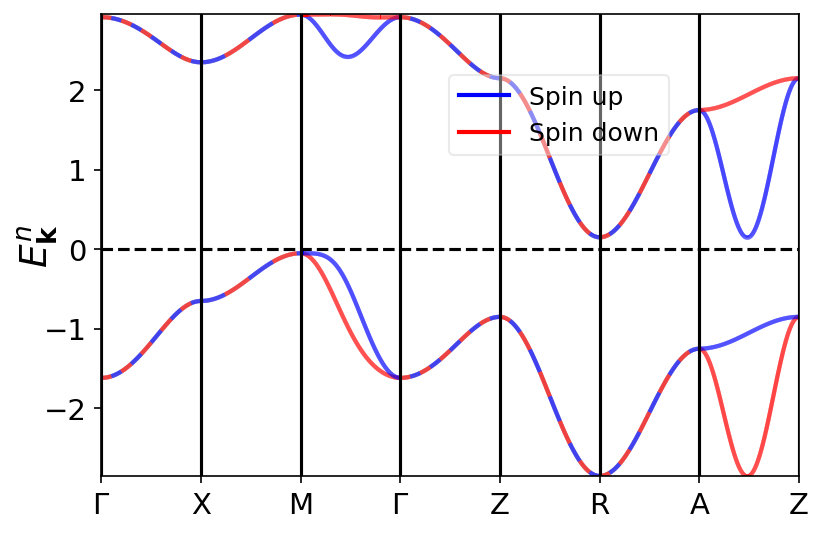

In [120]:
from matplotlib.ticker import ScalarFormatter


fig3, axs3 = plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=150)
scale_factor_tick = 0.035
scale_factor_label = 0.045
fig3_width, fig3_height = fig3.get_size_inches()

label_size= min(fig3_width, fig3_height)*scale_factor_label*100
tick_size= min(fig3_width, fig3_height)*scale_factor_tick*100



#---------------------------------------------------PLOT 1#---------------------------------------------------

from matplotlib.collections import LineCollection


x_values = np.arange(len(combinedband1))

# Function to create LineCollection for a band
def create_line_collection(x, y, colors):
    # Prepare points for line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    # Create segments between points
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    # Create LineCollection with the segments and corresponding colors
    lc = LineCollection(segments, colors=colors[:-1], linewidths=2)
    return lc

# Create LineCollections for each band
lc_band1 = create_line_collection(x_values, combinedband1, colors_band1)
lc_band2 = create_line_collection(x_values, combinedband2, colors_band2)
lc_band3 = create_line_collection(x_values, combinedband3, colors_band3)
lc_band4 = create_line_collection(x_values, combinedband4, colors_band4)

axs3.add_collection(lc_band1)
axs3.add_collection(lc_band2)
axs3.add_collection(lc_band3)
axs3.add_collection(lc_band4)

# Set limits
axs3.set_xlim(x_values.min(), x_values.max())
axs3.set_ylim(min(combinedband1.min(), combinedband2.min(), combinedband3.min(), combinedband4.min()),
                max(combinedband1.max(), combinedband2.max(), combinedband3.max(), combinedband4.max()))


# axs3.scatter(range(len(combinedband1)), combinedband1, c=colors_band1, marker='.', s=0.05, linewidths=0.5, alpha=0.6)
# axs3.scatter(range(len(combinedband2)), combinedband2, c=colors_band2, marker='.', s=0.05, linewidths=0.5, alpha=0.6)
# axs3.scatter(range(len(combinedband3)), combinedband3, c=colors_band3, marker='.', s=0.05, linewidths=0.5, alpha=0.6)
# axs3.scatter(range(len(combinedband4)), combinedband4, c=colors_band4, marker='.', s=0.05, linewidths=0.5, alpha=0.6)

axs3.axhline(0, linestyle="dashed", color="black")

# Manually create legend entries for spin up and spin down
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Spin up'),
    Line2D([0], [0], color='red', lw=2, label='Spin down')
]


# Add tick labels corresponding to symmetry points
changepoints = [0, iterations, 2*iterations, 3*iterations , 4*iterations, 5*iterations, 6*iterations, 7*iterations]
symmetry_points = [r'$\Gamma$', 'X', 'M', r'$\Gamma$', 'Z', 'R', 'A', 'Z']
for line in changepoints:
    axs3.axvline(x=line, color='black')


axs3.tick_params(axis='both', which='major', labelsize=tick_size)
axs3.tick_params(axis='both', which='minor', labelsize=tick_size/1.5)
axs3.xaxis.label.set_size(label_size)
axs3.yaxis.label.set_size(label_size)


#axs3.set_yticks((-1,0,1))

axs3.set_xticks(changepoints, symmetry_points)
axs3.set_ylabel(r"$E_{\mathbf{k}}^n$")
axs3.yaxis.set_label_coords(-0.06,0.5)
# leg = axs3.legend(handles=legend_elements, bbox_to_anchor=(0.67,0.725), bbox_transform=fig3.transFigure, fontsize=label_size/1.5 )
leg = axs3.legend(handles=legend_elements, bbox_to_anchor=(0.77,0.8), bbox_transform=fig3.transFigure, fontsize=label_size/1.5 )
leg.get_frame().set_alpha(0.4)


plt.show()


## Creating phase grid
Målet er: lav et grid over mu og J.
Diagonaliser for et bestemt J.
Udregn min(abs(E_i-mu)) for at finde den egenværdi der er tættest på 0.
Plot med denne minimum som colorbar værdi.

In [121]:
Jruns = np.linspace(0,6,10)
muruns = np.linspace(-2,2,10)

In [122]:
def j_mu_grid(j_list,mu_list, its):
    Egrid = np.empty((len(mu_list), len(j_list)))

    for i_mu, MU_VAL in enumerate(mu_list):
        for j_J, JVAL in enumerate(j_list):
            # Define the parameters
            mu_Fe = 0
            J = np.array([0,0,JVAL])
            J_x,J_y,J_z= J[0], J[1], J[2]

            #Define hopping parameters
            t1= -0.05
            t2= 0.7
            t3= 0.5
            t4= -0.15
            t5= -0.4
            t6= -0.6
            t7= 0.3
            t8= 1.7

            if ferromagnetic:
                mvals = np.array([0,1,0])
            else:
                mvals = np.array([0,0,0])

            mxval,myval,mzval = mvals[0], mvals[1], mvals[2]

            if enable_SOC:
                socvec = np.array([0.05,0.05,0.17])
            else:
                socvec = np.array([0,0,0])

            def soc(kx,ky,kz, socvec = socvec): # OBS might be wrong, ligning (2) i Mercès paper er ikke helt klar. Der er nogle lambda jeg ikke ved hvad er
                lol = np.array([
                    socvec[0] * np.sin(kz/2) * np.sin(kx/2) * np.cos(ky/2),
                    socvec[1] * np.sin(kz/2) * np.sin(ky/2) * np.cos(kx/2),
                    socvec[2] * np.cos(kz/2) * np.cos(kx/2) * np.cos(ky/2) * (np.cos(kx) - np.cos(ky))
                    ])
                return lol 

            # Energy offset / dispersion
            def epsilon_0(kx,ky,kz):
                return t1*(np.cos(kx)+np.cos(ky))+ t2*np.cos(kz) + t3*np.cos(kx)*np.cos(ky) + t4*(np.cos(kx) + np.cos(ky))*np.cos(kz) + t5*np.cos(kx)*np.cos(ky)*np.cos(kz) -mu_Fe 

            # Define hopping terms as functions of k 
            def t_x(kx,ky,kz):
                return t8*np.cos(kx/2)*np.cos(ky/2)*np.cos(kz/2)  

            def t_z(kx,ky,kz):
                if altermag:
                    return t6*np.sin(kx)*np.sin(ky)+t7*np.sin(kx)*np.sin(ky)*np.cos(kz)
                else:
                    return 0  
                

            iterations = its
            k_x = [np.zeros(iterations),np.linspace(0, np.pi, iterations) , np.linspace(0,np.pi,iterations)[::-1] ,np.zeros(iterations), np.zeros(iterations) , np.linspace(0, np.pi, iterations) , np.linspace(0,np.pi,iterations)[::-1]]
            k_y = [np.linspace(0, np.pi, iterations) , np.pi*np.ones(iterations) , np.linspace(0,np.pi,iterations)[::-1] ,np.zeros(iterations), np.linspace(0, np.pi, iterations) , np.pi*np.ones(iterations) , np.linspace(0,np.pi,iterations)[::-1]]
            k_z = [np.zeros(iterations),np.zeros(iterations) ,np.zeros(iterations),np.linspace(0,np.pi,iterations), np.pi*np.ones(iterations) , np.pi*np.ones(iterations) , np.pi*np.ones(iterations)]


            I = 1j

            #energies
            combinedband1 = np.zeros_like(k_x)
            combinedband2 = np.zeros_like(k_x)
            combinedband3 = np.zeros_like(k_x)
            combinedband4 = np.zeros_like(k_x)

            #The big loop
            for outer in range(len(k_x)):
                lm = soc(k_x[outer],k_y[outer],k_z[outer])
                #The energies
                eigval1 = np.zeros_like(k_x[0])
                eigval2 = np.zeros_like(k_x[0])
                eigval3 = np.zeros_like(k_x[0])
                eigval4 = np.zeros_like(k_x[0])

                bruh=1
                for inner in range(len(k_x[0])):
                    lm_x,lm_y,lm_z = lm[0][inner], lm[1][inner], lm[2][inner]
                    tz = t_z(k_x[outer][inner],k_y[outer][inner],k_z[outer][inner])
                    tx = t_x(k_x[outer][inner],k_y[outer][inner],k_z[outer][inner])
                    
                    epsilonmatrix = np.identity(4)*epsilon_0(k_x[outer][inner],k_y[outer][inner],k_z[outer][inner])
                    H4x4 = epsilonmatrix+ np.matrix([[tz+J_z+mzval, J_x - I*(J_y+myval)+mxval,tx- I*lm_z,-I*lm_x-lm_y],
                            [J_x+I*(J_y+myval)+mxval , tz-J_z-mzval , -I*lm_x+lm_y , tx+I*lm_z],
                            [tx+I*lm_z, I*lm_x+lm_y , -tz-J_z+mzval , I*(J_y-myval)-J_x+mxval],
                            [I*lm_x-lm_y , tx-I*lm_z, mxval+I*(myval-J_y)-J_x , -tz+J_z-mzval]])
                    

                    # Diagonalize the Hamiltonian
                    eigvals, eigvecs = np.linalg.eigh(H4x4)
                    
                    #Energies
                    eigval1[inner] = eigvals[0]
                    eigval2[inner] = eigvals[1]
                    eigval3[inner] = eigvals[2]
                    eigval4[inner] = eigvals[3]

                #from the innter loop to the outer
                combinedband1[outer] = eigval1
                combinedband2[outer] = eigval2
                combinedband3[outer] = eigval3
                combinedband4[outer] = eigval4

            combinedband1=np.concatenate(combinedband1)
            combinedband2=np.concatenate(combinedband2)
            combinedband3=np.concatenate(combinedband3)
            combinedband4=np.concatenate(combinedband4)

            minima   = [np.min(np.abs(combinedband1-MU_VAL)),
                        np.min(np.abs(combinedband2-MU_VAL)),
                        np.min(np.abs(combinedband3-MU_VAL)),
                        np.min(np.abs(combinedband4-MU_VAL))]
            minimum  = min(minima)

            # ----------------------------------------------------------
            # 3. save the result in the grid instead of ELIST.append()
            # ----------------------------------------------------------
            Egrid[i_mu, j_J] = minimum

            # row label µ
            #Column label J
    return Egrid

In [123]:
mutest = np.linspace(-1,1,50)
jtest = np.linspace(1e-4,6,50)
E_arr = j_mu_grid(jtest,mutest,1000)

KeyboardInterrupt: 

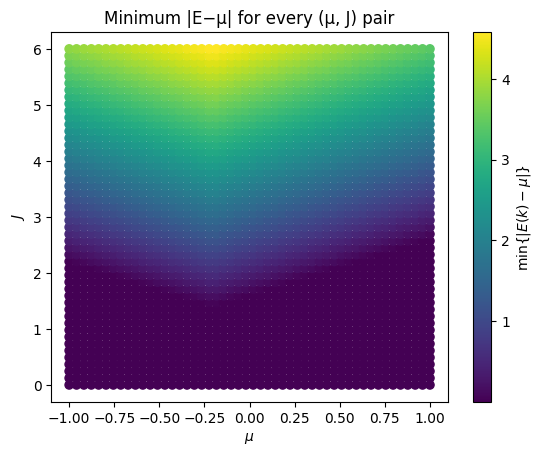

In [ ]:
# 2. build the coordinate vectors that match the row‑major layout of E_arr
x = np.repeat(mutest, jtest.size)   # μ coordinate of every grid point
y = np.tile(jtest,  mutest.size)    # J coordinate of every grid point
z = E_arr.ravel()  

# 3. scatter‑plot with colour bar
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=z)            # default colormap
fig.colorbar(sc, ax=ax).set_label(r'$\min\{|E(k)-\mu|\}$')

ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$J$')
ax.set_title('Minimum |E−μ| for every (μ, J) pair')
plt.show()

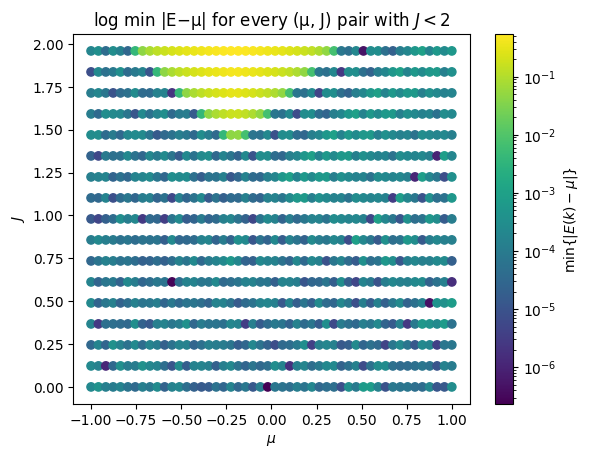

In [ ]:
# 2. build the coordinate vectors that match the row‑major layout of E_arr
x = np.repeat(mutest, jtest.size)   # μ coordinate of every grid point
y = np.tile(jtest,  mutest.size)    # J coordinate of every grid point
z = E_arr.ravel()  

mask = y < 2
x_filtered = x[mask]
y_filtered = y[mask]
z_filtered = z[mask]

# 3. scatter‑plot with colour bar
fig, ax = plt.subplots()
# sc = ax.scatter(x_filtered, y_filtered, c=z_filtered)
# sc = ax.scatter(x_filtered, y_filtered, c=z_filtered, vmin=0, vmax=0.1)
import matplotlib.colors as mcolors

norm = mcolors.LogNorm(vmin=z_filtered.min(), vmax=z_filtered.max())
sc = ax.scatter(x_filtered, y_filtered, c=z_filtered, norm=norm)
fig.colorbar(sc, ax=ax).set_label(r'$\min\{|E(k)-\mu|\}$')

# plt.ylim(1,1.75)

ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$J$')
ax.set_title('log min |E−μ| for every (μ, J) pair with $J < 2$')
plt.show()

In the closeup, we see that I should actually start at J=1.25 or so.

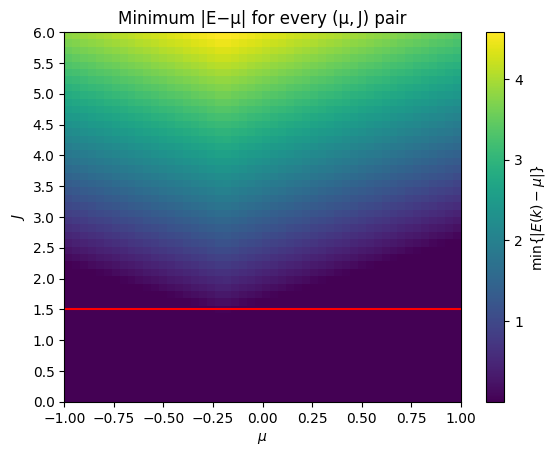

In [ ]:
plt.imshow(E_arr.T, aspect='auto',
           extent=[mutest.min(), mutest.max(),   # x‑range  (μ)
                jtest.min(),  jtest .max()],  # y‑range  (J)
           origin='lower')
plt.colorbar(label=r'$\min\{|E(k)-\mu|\}$')
plt.xlabel(r'$\mu$')
plt.yticks(np.arange(min(jtest), max(jtest)+0.5, 0.5))
# plt.ylim(0,2)
plt.ylabel(r'$J$')
plt.title('Minimum |E−μ| for every (μ, J) pair')
plt.axhline(1.5, color='red')
plt.show()


The plot above shows the region of interest: the color change occurs when the chemical potential becomes placed in the middle without intersecting any bands.
This gives us a region of interest. 

E.g. for µ=-0.25, I should integrate for at lot of points with J going from 1.5 to 1.8.

Can also check µ=0 with J=1.6 to J=2

ERROR: I find only for a certain choice of path. I need info for entire BZ

## Retry phase grid

In [126]:
def j_mu_grid(j_list,mu_list, nk):
    Egrid = np.empty((len(mu_list), len(j_list)))
 # 3D BZ meshgrid: from -pi to pi in each direction
    kpts = np.linspace(-np.pi, np.pi, nk, endpoint=False)
    kx, ky, kz = np.meshgrid(kpts, kpts, kpts, indexing='ij')
    kx_flat, ky_flat, kz_flat = kx.flatten(), ky.flatten(), kz.flatten()

    for i_mu, MU_VAL in enumerate(mu_list):
        print(f'Mu={MU_VAL} started')
        for j_J, JVAL in enumerate(j_list):
            # Define the parameters
            mu_Fe = 0
            J = np.array([0,0,JVAL])
            J_x,J_y,J_z= J[0], J[1], J[2]

            #Define hopping parameters
            t1= -0.05
            t2= 0.7
            t3= 0.5
            t4= -0.15
            t5= -0.4
            t6= -0.6
            t7= 0.3
            t8= 1.7

            if ferromagnetic:
                mvals = np.array([0,1,0])
            else:
                mvals = np.array([0,0,0])

            mxval,myval,mzval = mvals[0], mvals[1], mvals[2]

            if enable_SOC:
                socvec = np.array([0.05,0.05,0.17])
            else:
                socvec = np.array([0,0,0])

            def soc(kx,ky,kz, socvec = socvec): # OBS might be wrong, ligning (2) i Mercès paper er ikke helt klar. Der er nogle lambda jeg ikke ved hvad er
                lol = np.array([
                    socvec[0] * np.sin(kz/2) * np.sin(kx/2) * np.cos(ky/2),
                    socvec[1] * np.sin(kz/2) * np.sin(ky/2) * np.cos(kx/2),
                    socvec[2] * np.cos(kz/2) * np.cos(kx/2) * np.cos(ky/2) * (np.cos(kx) - np.cos(ky))
                    ])
                return lol 

            # Energy offset / dispersion
            def epsilon_0(kx,ky,kz):
                return t1*(np.cos(kx)+np.cos(ky))+ t2*np.cos(kz) + t3*np.cos(kx)*np.cos(ky) + t4*(np.cos(kx) + np.cos(ky))*np.cos(kz) + t5*np.cos(kx)*np.cos(ky)*np.cos(kz) -mu_Fe 

            # Define hopping terms as functions of k 
            def t_x(kx,ky,kz):
                return t8*np.cos(kx/2)*np.cos(ky/2)*np.cos(kz/2)  

            def t_z(kx,ky,kz):
                if altermag:
                    return t6*np.sin(kx)*np.sin(ky)+t7*np.sin(kx)*np.sin(ky)*np.cos(kz)
                else:
                    return 0  
                
            I = 1j

            #energies
            band_energies = []

            for i in range(len(kx_flat)):
                kxi, kyi, kzi = kx_flat[i], ky_flat[i], kz_flat[i]
                lm_x, lm_y, lm_z = soc(kxi, kyi, kzi)
                tx = t_x(kxi, kyi, kzi)
                tz = t_z(kxi, kyi, kzi)
                eps0 = epsilon_0(kxi, kyi, kzi)
                epsmat = np.identity(4) * eps0

                H4x4 = epsmat + np.array([
                    [tz + J_z + mzval, J_x - I * (J_y + myval) + mxval, tx - I * lm_z, -I * lm_x - lm_y],
                    [J_x + I * (J_y + myval) + mxval, tz - J_z - mzval, -I * lm_x + lm_y, tx + I * lm_z],
                    [tx + I * lm_z, I * lm_x + lm_y, -tz - J_z + mzval, I * (J_y - myval) - J_x + mxval],
                    [I * lm_x - lm_y, tx - I * lm_z, mxval + I * (myval - J_y) - J_x, -tz + J_z - mzval]
                ])

                eigvals = np.linalg.eigvalsh(H4x4)
                diff = np.min(np.abs(eigvals - MU_VAL))  # closest band to chemical potential
                band_energies.append(diff)

            Egrid[i_mu, j_J] = np.min(band_energies)

            # row label µ
            #Column label J
            print(f'J={JVAL} done')
        print(f'mu={MU_VAL} done')
    return Egrid

Text(0.5, 0, '# of meshgrid points')

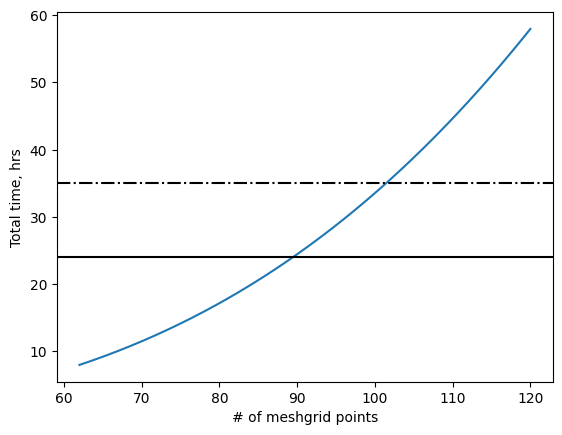

In [171]:
time_per_diag=(479.5*60)/(40*40*62**3)
meshtest = np.linspace(62,120,1000)
plt.plot(meshtest,(time_per_diag*40*40*meshtest**3)/(60**2))
plt.axhline(24, color='black', label='1day')
plt.axhline(35, linestyle='-.',color='black', label='35hrs')
plt.ylabel('Total time, hrs')
plt.xlabel('# of meshgrid points')

In [ ]:
mutest_large = np.linspace(-1,1,40)
jtest_large = np.linspace(1e-4,6,40)
E_arr_large = j_mu_grid(jtest,mutest,62)

Mu=-1.0 started
J=0.0001 done
J=0.15394358974358974 done
J=0.3077871794871795 done
J=0.46163076923076923 done
J=0.615474358974359 done
J=0.7693179487179487 done
J=0.9231615384615385 done
J=1.0770051282051283 done
J=1.230848717948718 done
J=1.3846923076923077 done
J=1.5385358974358974 done
J=1.6923794871794873 done
J=1.846223076923077 done
J=2.0000666666666667 done
J=2.153910256410257 done
J=2.3077538461538465 done
J=2.461597435897436 done
J=2.615441025641026 done
J=2.7692846153846156 done
J=2.9231282051282053 done
J=3.076971794871795 done
J=3.230815384615385 done
J=3.384658974358975 done
J=3.5385025641025645 done
J=3.692346153846154 done
J=3.846189743589744 done
J=4.0000333333333336 done
J=4.153876923076923 done
J=4.307720512820513 done
J=4.461564102564102 done
J=4.615407692307692 done
J=4.769251282051282 done
J=4.923094871794872 done
J=5.076938461538462 done
J=5.230782051282051 done
J=5.384625641025641 done
J=5.5384692307692305 done
J=5.692312820512821 done
J=5.84615641025641 done
J=6

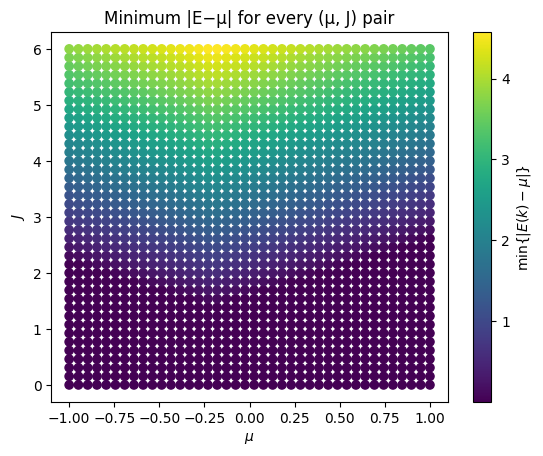

In [ ]:
# 2. build the coordinate vectors that match the row‑major layout of E_arr
x = np.repeat(mutest_large, jtest_large.size)   # μ coordinate of every grid point
y = np.tile(jtest_large,  mutest_large.size)    # J coordinate of every grid point
z = E_arr_large.ravel()  

# 3. scatter‑plot with colour bar
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=z)            # default colormap
fig.colorbar(sc, ax=ax).set_label(r'$\min\{|E(k)-\mu|\}$')

ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$J$')
ax.set_title('Minimum |E−μ| for every (μ, J) pair')
plt.show()

attempt 2

In [129]:
# def j_mu_grid(j_list,mu_list, its):
#     Egrid = np.empty((len(mu_list), len(j_list)))

#     # ----------- NEW: create a meshgrid over BZ -------------
#     kpts = np.linspace(-np.pi, np.pi, its, endpoint=False)
#     kx_grid, ky_grid, kz_grid = np.meshgrid(kpts, kpts, kpts, indexing='ij')

#     k_x = [kx_grid.flatten()]
#     k_y = [ky_grid.flatten()]
#     k_z = [kz_grid.flatten()]
#     # ---------------------------------------------------------

#     for i_mu, MU_VAL in enumerate(mu_list):
#         for j_J, JVAL in enumerate(j_list):
#             # Define the parameters
#             J = np.array([0,0,JVAL])
#             J_x,J_y,J_z= J[0], J[1], J[2]

#             #Define hopping parameters
#             t1= -0.05
#             t2= 0.7
#             t3= 0.5
#             t4= -0.15
#             t5= -0.4
#             t6= -0.6
#             t7= 0.3
#             t8= 1.7

#             if ferromagnetic:
#                 mvals = np.array([0,1,0])
#             else:
#                 mvals = np.array([0,0,0])

#             mxval,myval,mzval = mvals[0], mvals[1], mvals[2]

#             if enable_SOC:
#                 socvec = np.array([0.05,0.05,0.17])
#             else:
#                 socvec = np.array([0,0,0])

#             def soc(kx,ky,kz, socvec = socvec): # OBS might be wrong, ligning (2) i Mercès paper er ikke helt klar. Der er nogle lambda jeg ikke ved hvad er
#                 lol = np.array([
#                     socvec[0] * np.sin(kz/2) * np.sin(kx/2) * np.cos(ky/2),
#                     socvec[1] * np.sin(kz/2) * np.sin(ky/2) * np.cos(kx/2),
#                     socvec[2] * np.cos(kz/2) * np.cos(kx/2) * np.cos(ky/2) * (np.cos(kx) - np.cos(ky))
#                     ])
#                 return lol 

#             # Energy offset / dispersion
#             def epsilon_0(kx,ky,kz):
#                 return t1*(np.cos(kx)+np.cos(ky))+ t2*np.cos(kz) + t3*np.cos(kx)*np.cos(ky) + t4*(np.cos(kx) + np.cos(ky))*np.cos(kz) + t5*np.cos(kx)*np.cos(ky)*np.cos(kz) 

#             # Define hopping terms as functions of k 
#             def t_x(kx,ky,kz):
#                 return t8*np.cos(kx/2)*np.cos(ky/2)*np.cos(kz/2)  

#             def t_z(kx,ky,kz):
#                 if altermag:
#                     return t6*np.sin(kx)*np.sin(ky)+t7*np.sin(kx)*np.sin(ky)*np.cos(kz)
#                 else:
#                     return 0  
                


#             I = 1j

#             #energies
#             combinedband1 = np.zeros_like(k_x)
#             combinedband2 = np.zeros_like(k_x)
#             combinedband3 = np.zeros_like(k_x)
#             combinedband4 = np.zeros_like(k_x)

#             #The big loop
#             for outer in range(len(k_x)):
#                 lm = soc(k_x[outer],k_y[outer],k_z[outer])
#                 #The energies
#                 eigval1 = np.zeros_like(k_x[0])
#                 eigval2 = np.zeros_like(k_x[0])
#                 eigval3 = np.zeros_like(k_x[0])
#                 eigval4 = np.zeros_like(k_x[0])

#                 bruh=1
#                 for inner in range(len(k_x[0])):
#                     kxi = k_x[outer][inner]
#                     kyi = k_y[outer][inner]
#                     kzi = k_z[outer][inner]

#                     lm_x,lm_y,lm_z = lm[0][inner], lm[1][inner], lm[2][inner]
#                     tz = t_z(kxi,kyi,kzi)
#                     tx = t_x(kxi,kyi,kzi)
                    
#                     epsilonmatrix = np.identity(4)*epsilon_0(kxi,kyi,kzi)
#                     H4x4 = epsilonmatrix+ np.matrix([[tz+J_z+mzval, J_x - I*(J_y+myval)+mxval,tx- I*lm_z,-I*lm_x-lm_y],
#                             [J_x+I*(J_y+myval)+mxval , tz-J_z-mzval , -I*lm_x+lm_y , tx+I*lm_z],
#                             [tx+I*lm_z, I*lm_x+lm_y , -tz-J_z+mzval , I*(J_y-myval)-J_x+mxval],
#                             [I*lm_x-lm_y , tx-I*lm_z, mxval+I*(myval-J_y)-J_x , -tz+J_z-mzval]])
                    

#                     # Diagonalize the Hamiltonian
#                     eigvals, _ = np.linalg.eigh(H4x4)
                    
#                     #Energies
#                     eigval1[inner] = eigvals[0]
#                     eigval2[inner] = eigvals[1]
#                     eigval3[inner] = eigvals[2]
#                     eigval4[inner] = eigvals[3]

#                 #from the innter loop to the outer
#                 combinedband1[outer] = eigval1
#                 combinedband2[outer] = eigval2
#                 combinedband3[outer] = eigval3
#                 combinedband4[outer] = eigval4

#             combinedband1=np.concatenate(combinedband1)
#             combinedband2=np.concatenate(combinedband2)
#             combinedband3=np.concatenate(combinedband3)
#             combinedband4=np.concatenate(combinedband4)

#             minima   = [np.min(np.abs(combinedband1-MU_VAL)),
#                         np.min(np.abs(combinedband2-MU_VAL)),
#                         np.min(np.abs(combinedband3-MU_VAL)),
#                         np.min(np.abs(combinedband4-MU_VAL))]
#             minimum  = min(minima)

#             # ----------------------------------------------------------
#             # 3. save the result in the grid instead of ELIST.append()
#             # ----------------------------------------------------------
#             Egrid[i_mu, j_J] = minimum

#             # row label µ
#             #Column label J
#     return Egrid

In [146]:
#Tjekker i detalje med én værdi af mu
mutest = np.array([-0.25]) #np.linspace(-0.5,-0.2,4)
jtest = np.linspace(1e-4,6,55)
E_arr = j_mu_grid(jtest,mutest,201)

Mu=-0.25 started
J=0.0001 done
J=0.11120925925925927 done
J=0.22231851851851853 done
J=0.33342777777777777 done
J=0.44453703703703706 done
J=0.5556462962962964 done
J=0.6667555555555555 done
J=0.7778648148148148 done
J=0.8889740740740741 done
J=1.0000833333333334 done
J=1.1111925925925927 done
J=1.222301851851852 done
J=1.333411111111111 done
J=1.4445203703703704 done
J=1.5556296296296297 done
J=1.666738888888889 done
J=1.7778481481481483 done
J=1.8889574074074076 done
J=2.000066666666667 done
J=2.1111759259259264 done
J=2.2222851851851857 done
J=2.333394444444445 done
J=2.4445037037037043 done
J=2.5556129629629636 done
J=2.6667222222222224 done
J=2.7778314814814817 done
J=2.888940740740741 done
J=3.0000500000000003 done
J=3.1111592592592596 done
J=3.222268518518519 done
J=3.333377777777778 done
J=3.4444870370370375 done
J=3.555596296296297 done
J=3.666705555555556 done
J=3.7778148148148154 done
J=3.8889240740740747 done
J=4.0000333333333336 done
J=4.111142592592593 done
J=4.2222518518

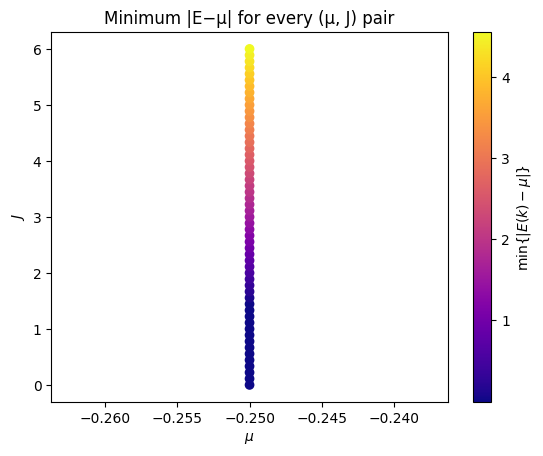

In [166]:
# 2. build the coordinate vectors that match the row‑major layout of E_arr
x = np.repeat(mutest, jtest.size)   # μ coordinate of every grid point
y = np.tile(jtest,  mutest.size)    # J coordinate of every grid point
z = E_arr.ravel()  

# 3. scatter‑plot with colour bar
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=z, cmap='plasma')            # default colormap
fig.colorbar(sc, ax=ax).set_label(r'$\min\{|E(k)-\mu|\}$')

ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$J$')
ax.set_title('Minimum |E−μ| for every (μ, J) pair')
plt.show()

Text(0, 0.5, '$\\min(|E(k)-\\mu=-0.25|)$')

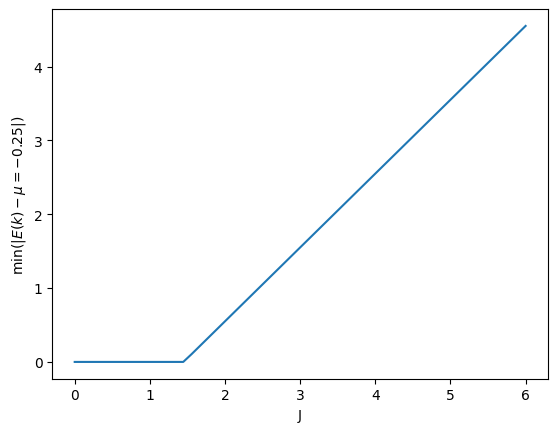

In [167]:
plt.plot(jtest, E_arr[0])
plt.xlabel('J')
plt.ylabel(r'$\min(|E(k)-\mu=-0.25|)$')

# 2: numerical integration
I will be doing just RuO2 in the simplest case. Meaning, reduced to linear order and with no ferromagnetic moment.
I will integrate for a range of different $\mu$ and $J_x$.
Ranges of interest: μ=[-1,1] and J=[0.1,1.5,2,2.5,3,4,5] (where the 0.1 is just for reference)

In [133]:
bigNrun = 50000
mu = 0.25
if altermag:
    J = np.array([0.1,0,0])
else:
    J = np.array([0,0,0])
J_x,J_y,J_z= J[0], J[1], J[2]

In [134]:
import vegas

enable_SOC = True #Sets SOC to zero when false
altermag = True #Sets J to 0 when false


#Define hopping parameters
t1= -0.05
t2= 0.7
t3= 0.5
t4= -0.15
t5= -0.4
t6= -0.6
t7= 0.3
t8= 1.7

# Define the parameters
  # Magnetic interaction term

if enable_SOC:
    socvec = np.array([0.05,0.05,0.17]) #  Note that in tetragonal systems the strength of the SOC is the same in the x and y directions (λ), while it is different for the z component!!
    #Ensure all are floats, otherwise numba messes up
    # socvec = np.array([0.1,0.0,0.0]) #  Note that in tetragonal systems the strength of the SOC is the same in the x and y directions (λ), while it is different for the z component!!

else:
    socvec = np.array([0.0,0.0,0.0])

 
def soc(kx,ky,kz, soc_in):
    lol = [
        soc_in[0] * np.sin(kz/2) * np.sin(kx/2) * np.cos(ky/2),
        -soc_in[1] * np.sin(kz/2) * np.sin(ky/2) * np.cos(kx/2), # THIS MINUS IS SUPPOSED TO BE HERE for RuO2
        soc_in[2] * np.cos(kz/2) * np.cos(kx/2) * np.cos(ky/2) * (np.cos(kx) - np.cos(ky))
        ]
    return lol 

 
# Energy offset / dispersion
def epsilon_0(kx,ky,kz,mu):
    return t1*(np.cos(kx)+np.cos(ky)) - mu + t2*np.cos(kz) + t3*np.cos(kx)*np.cos(ky) + t4*(np.cos(kx) + np.cos(ky))*np.cos(kz) + t5*np.cos(kx)*np.cos(ky)*np.cos(kz) 
#Has mu subtracted!!


# Define hopping terms as functions of k 
 
def t_x(kx,ky,kz):
    return t8*np.cos(kx/2)*np.cos(ky/2)*np.cos(kz/2)  
 
def t_z(kx,ky,kz):
    return t6*np.sin(kx)*np.sin(ky)+t7*np.sin(kx)*np.sin(ky)*np.cos(kz)

 
def deriv_t_x(param,kx,ky,kz): # param decides whether derivative is wrt kx,ky or kz
    if param ==0:
        return -(t8/2) * np.sin(kx/2)*np.cos(ky/2)*np.cos(kz/2)
    if param ==1:
        return -(t8/2) * np.cos(kx/2)*np.sin(ky/2)*np.cos(kz/2)
    if param ==2:
        return -(t8/2) * np.cos(kx/2)*np.cos(ky/2)*np.sin(kz/2) 
    else:
        return 0
   
def deriv_t_z(param,kx,ky,kz): # param decides whether derivative is wrt kx,ky or kz
    if altermag:
        if param ==0:
            return (t6/2)*np.cos(kx)*np.sin(ky)+t7*np.cos(kx)*np.sin(ky)*np.cos(kz)
        if param ==1:
            return (t6/2)*np.sin(kx)*np.cos(ky)+t7*np.sin(kx)*np.cos(ky)*np.cos(kz)
        if param ==2:
            return -t7*np.sin(kx)*np.sin(ky)*np.sin(kz)
        else:
            return 0 
    else:
        return 0


 
def deriv_lm_x(param, kx,ky,kz, lm_x):
    if param==0:
        return (lm_x/2) * np.sin(kz/2) * np.cos(kx/2) * np.cos(ky/2)
    if param==1:
        return (-lm_x/2) * np.sin(kz/2) * np.sin(kx/2) * np.sin(ky/2)
    if param==2:
        return (lm_x/2) * np.cos(kz/2) * np.sin(kx/2) * np.cos(ky/2)
    else:
        return 0

 
def deriv_lm_y(param, kx,ky,kz, lm_y):
    if param==0:
        return (lm_y/2) * np.sin(kz/2) * np.sin(ky/2) * np.sin(kx/2)
    if param==1:
        return -(lm_y/2) * np.sin(kz/2) * np.cos(ky/2) * np.cos(kx/2)
    if param==2:
        return -(lm_y/2) * np.cos(kz/2) * np.sin(ky/2) * np.cos(kx/2)
    else:
        return 0
    
 
def deriv_lm_z(param, kx,ky,kz, lm_z):
    if param==0:
        return -(lm_z/2) * np.cos(kz/2) * np.sin(kx/2) * np.cos(ky/2) * (np.cos(kx) - np.cos(ky)) - lm_z*np.cos(kz/2) * np.cos(kx/2) * np.cos(ky/2) * np.sin(kx)
    if param==1:
        return -(lm_z/2) * np.cos(kz/2) * np.cos(kx/2) * np.sin(ky/2) * (np.cos(kx) - np.cos(ky)) + lm_z*np.cos(kz/2) * np.cos(kx/2) * np.cos(ky/2) * np.sin(ky)
    if param==2:
        return -(lm_z/2) * np.sin(kz/2) * np.cos(kx/2) * np.cos(ky/2) * (np.cos(kx) - np.cos(ky))
    else:
        return 0


unitfactor = -((213914163877964163*np.pi)/2760862562500000)*10**(-6)*(1/(4.48*10**(-8)))


In [135]:
# SOCRUNS = []
# for i in np.linspace(0,1.5,10):
#     SOCRUNS.append(i*socvec)

# socstrengthfactors1 = np.linspace(0,1.5,10)

# SOCRUNS2 = []
# for i in np.linspace(0,1.5,15):
#     SOCRUNS2.append(i*socvec)


# SOCRUNSTEST = []
# for i in np.linspace(0,1.5,11):
#     bruhvec = np.array([0.05,0,0]) #OBS OBS OBS denne skal ændres fra materiale til materiale
#     SOCRUNSTEST.append(i*bruhvec)


# socstrengthfactors_test = np.linspace(0,1.5,11)

In [136]:
# magdata = np.genfromtxt('magnetization results ruO2 N=300.txt')
# soc_strength_factors_forfit = np.linspace(0.1,2,14)

# from iminuit import Minuit
# from ExternalFunctions import Chi2Regression
# import scipy.stats as ss

# # def secondfit(x,a,c):
# #     return a*x +c*x**2#+b

# def testfit(x,a,b,c):
#     return a*x**4 + b*x**2 + c*x 

# chi2_RuO2 = Chi2Regression(testfit, soc_strength_factors_forfit, magdata,sy=1e-8)

# mchi2_RuO2 = Minuit(chi2_RuO2, a=-1e-7,b=0,c=0,)
# mchi2_RuO2.errordef = 1.0     
# mchi2_RuO2.migrad();           

# print('Fit with 4th and second order')
# # First, check if the result was a valid minimum:
# if (not mchi2_RuO2.fmin.is_valid) :
#     print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    

# # Loop to get both parameter values and uncertainties:
# for name in mchi2_RuO2.parameters :
#     value, error = mchi2_RuO2.values[name], mchi2_RuO2.errors[name]
#     print(f"Fit value: {name} = {value} +/- {error}")

# # Get Chi2 value:
# chi2_value_RuO2 = mchi2_RuO2.fval       

# # Get number of degrees-of-freedom (Ndof):
# Ndof_value_RuO2 = len(magdata) - mchi2_RuO2.nfit

# Prob_value_RuO2 = ss.chi2.sf(chi2_value_RuO2, Ndof_value_RuO2) # The chi2 probability given N_DOF degrees of freedom
# print(f"Chi2 value: {chi2_value_RuO2:.1f}   Ndof = {Ndof_value_RuO2:.0f}    Prob(Chi2,Ndof) = {Prob_value_RuO2:5.3f}")

# plt.plot(soc_strength_factors_forfit,magdata, '.',label="FESb2") #yerr=estimated_errors_2, fmt='.', 
# plt.plot(np.linspace(0,2,100) , testfit(np.linspace(0,2,100),mchi2_RuO2.values[0],mchi2_RuO2.values[1], mchi2_RuO2.values[2]), label="Polynomial fit")

# plt.title("Fitting magnetization when J=0.2")
# plt.xlabel(r'$\alpha_{SOC}$', fontsize=18)
# plt.ylabel(r'$M_y$', fontsize=18)
# plt.legend()
# plt.savefig("RuO2 fitting magdata.pdf", format="pdf", bbox_inches="tight")
# plt.show()



def m_RuO2(socin, my):
    # a = mchi2_RuO2.values[0]
    # c = mchi2_RuO2.values[1]
    # x = socin/socvec
    # x=x[0]
    # result = my*(a*x + c*x**2)
    return 0




In [137]:
def integrand_3_reordered_SOCIN_TEST(kz, ky, kx, param1, param2, my_val, jx, SOCIN, kbT,mu):

    # Compute 'my' value
    my = m_RuO2(SOCIN, my_val)  # Important update #FOR NOW JUST RETURNS 0.

    # Prepare arrays for alpha and beta
    alphas = np.array([1, -1])
    betas = np.array([1, -1])

    # Initialize arrays to collect terms
    # Dimensions:
    # - For total_terms_m: (2, 2, 4, 3, 2)
    # - For total_terms_alter: (2, 2, 2, 3, 2)
    # - For total_terms_extra: (2, 2, 2, 2)
    total_terms_m = np.zeros((2, 2, 9, 3, 2))
    total_terms_alter = np.zeros((2, 2, 2, 3, 2))
    total_terms_extra = np.zeros((2, 2, 2, 2))

    # Define energy functions
    def energyfunc_3(alpha, beta, kx, ky, kz, my, jx):
        soc_x, soc_y, soc_z = soc(kx, ky, kz, soc_in=SOCIN)
        tx = t_x(kx, ky, kz)
        tz = t_z(kx, ky, kz)
        inner = (jx**2 * (soc_y**2 + soc_z**2 + tz**2) +
                 my**2 * (soc_y**2 + tx**2 + tz**2) -
                 2 * jx * my * soc_z * tx)
        energy = alpha * np.sqrt(
            jx**2 + my**2 + soc_x**2 + soc_y**2 + soc_z**2 + tx**2 + tz**2 +
            2 * beta * np.sqrt(inner)
        )
        return energy

    def energy_tilde_3(beta, kx, ky, kz, my, jx):
        soc_y, soc_z = soc(kx, ky, kz, soc_in=SOCIN)[1:]
        tx = t_x(kx, ky, kz)
        tz = t_z(kx, ky, kz)
        energy = beta * np.sqrt(
            jx**2 * (soc_y**2 + soc_z**2 + tz**2) +
            my**2 * (soc_y**2 + tx**2 + tz**2) -
            2 * jx * my * soc_z * tx
        )
        return energy

    def fermi_dirac_dist_3(alpha, beta, kx, ky, kz, my, jx, kbT,mu):
        eps = epsilon_0(kx, ky, kz,mu)
        energy = energyfunc_3(alpha, beta, kx, ky, kz, my, jx)
        denominator = np.exp((energy + eps) / kbT) + 1
        return 1 / denominator

    # Define Berry curvature functions
    def berry(alpha, beta, param1, param2, kx, ky, kz, my, jx):
        # The values I need
        soc_y = soc(kx, ky, kz, soc_in=SOCIN)[1]
        lm_y = SOCIN[1]
        energy = energyfunc_3(alpha, beta, kx, ky, kz, my, jx)
        etilde = energy_tilde_3(beta, kx, ky, kz, my, jx)
        tz = t_z(kx, ky, kz)
        tx = t_x(kx, ky, kz)

        # # Writing up the Berry curvature terms
        # outerfactor = 3 * my / 8
        # factor1 = outerfactor * jx**2 / (8 * etilde**3)
        # factor2 = outerfactor * (jx**4 + jx**2 * tx**2) / (energy**2 * etilde**3)
        # factor3 = outerfactor * 2 * jx**2 / (energy**2 * etilde**2)
        # factor4 = outerfactor / (energy**2)

        #OBS OBS OBS OBS

        factor1 = (my*(jx**2))/(8*etilde**3)
        factor2 = (my**3)/(8*etilde**3)

        factor3 = (3*my*(jx**4))/(8*energy**2 * etilde**3)
        factor4 = (6*(my**3)*(jx**2))/(8*energy**2 * etilde**3)
        factor5 = (3*(my**5))/(8*energy**2 * etilde**3)
        factor6 = (3*my*(tx**2)*(jx**2))/(8*energy**2 * etilde**3)

        factor7 = (6*my*(jx**2))/(8*energy**2 * etilde**2)
        factor8 = (6*(my**3))/(8*energy**2 * etilde**2)

        factor9 = (3*my)/(8*energy**2 *etilde)

        deriv_terms = [
            (soc_y * deriv_t_x(param1, kx, ky, kz) * deriv_t_z(param2, kx, ky, kz),
             -soc_y * deriv_t_x(param2, kx, ky, kz) * deriv_t_z(param1, kx, ky, kz)),
            (tx * deriv_t_z(param1, kx, ky, kz) * deriv_lm_y(param2, kx, ky, kz, lm_y),
             -tx * deriv_t_z(param2, kx, ky, kz) * deriv_lm_y(param1, kx, ky, kz, lm_y)),
            (tz * deriv_lm_y(param1, kx, ky, kz, lm_y) * deriv_t_x(param2, kx, ky, kz),
             -tz * deriv_lm_y(param2, kx, ky, kz, lm_y) * deriv_t_x(param1, kx, ky, kz))
        ]

        factors = [factor1, factor2, factor3, factor4,factor5,factor6,factor7,factor8,factor9]
        # factors=[0,0,0,0,0,0,0,0,0] # OBS OBS ------------------------------------------------------DELETE THIS IF YOU WANT THE M PART OBSOBS
        terms = []
        for factor in factors:
            term_list = []
            for deriv in deriv_terms:
                term_array = np.array([factor * deriv[0], factor * deriv[1]])
                term_list.append(term_array)
            terms.append(term_list)

        berry_terms = np.array(terms)  # Shape: (4, 3, 2)
        return berry_terms

    def berry2(alpha, beta, param1, param2, kx, ky, kz, my, jx):
        soc_x = soc(kx, ky, kz, soc_in=SOCIN)[0]
        lm_x = SOCIN[0]
        energy = energyfunc_3(alpha, beta, kx, ky, kz, my, jx)
        etilde = energy_tilde_3(beta, kx, ky, kz, my, jx)
        tz = t_z(kx, ky, kz)
        tx = t_x(kx, ky, kz)

        # Writing up the Berry curvature terms
        outerfactor = jx * tz / (8 * energy**3)
        factor1 = outerfactor * (jx**2 * tz**2 + my**2*(tx**2 + tz**2)) / (etilde**3)
 
        factor2 = outerfactor * (3 / etilde)

        deriv_terms_main = [
            (soc_x * deriv_t_x(param1, kx, ky, kz) * deriv_t_z(param2, kx, ky, kz),
             -soc_x * deriv_t_x(param2, kx, ky, kz) * deriv_t_z(param1, kx, ky, kz)),
            (tx * deriv_t_z(param1, kx, ky, kz) * deriv_lm_x(param2, kx, ky, kz, lm_x),
             -tx * deriv_t_z(param2, kx, ky, kz) * deriv_lm_x(param1, kx, ky, kz, lm_x)),
            (tz * deriv_lm_x(param1, kx, ky, kz, lm_x) * deriv_t_x(param2, kx, ky, kz),
             -tz * deriv_lm_x(param2, kx, ky, kz, lm_x) * deriv_t_x(param1, kx, ky, kz))
        ]

        factors_main = [factor1, factor2]
        terms_main = []
        for factor in factors_main:
            term_list = []
            for deriv in deriv_terms_main:
                term_array = np.array([factor * deriv[0], factor * deriv[1]])
                term_list.append(term_array)
            terms_main.append(term_list)

        berry_terms_main = np.array(terms_main)  # Shape: (2, 3, 2)

        # Extra terms
        outerfactor2 = jx / (8 * energy**3)
        factor_extra1 = outerfactor2 * 3 * (jx**2 * tz**2 + my**2*(tx**2 + tz**2)) / (etilde**2)
        factor_extra2 =outerfactor2

        deriv_extra = (
            deriv_lm_x(param1, kx, ky, kz, lm_x) * deriv_t_x(param2, kx, ky, kz),
            -deriv_lm_x(param2, kx, ky, kz, lm_x) * deriv_t_x(param1, kx, ky, kz)
        )

        term_extra1 = np.array([factor_extra1 * deriv_extra[0], factor_extra1 * deriv_extra[1]])
        term_extra2 = np.array([factor_extra2 * deriv_extra[0], factor_extra2 * deriv_extra[1]])

        berry_terms_extra = np.array([term_extra1, term_extra2])  # Shape: (2, 2)

        return berry_terms_main, berry_terms_extra

    # Loop over alpha and beta indices
    for i_alpha, alpha in enumerate(alphas):
        for i_beta, beta in enumerate(betas):
            # Compute Fermi-Dirac distribution
            FD = fermi_dirac_dist_3(alpha, beta, kx, ky, kz, my, jx, kbT,mu)

            # Compute Berry curvature terms
            berry_m = berry(alpha, beta, param1, param2, kx, ky, kz, my, jx)  # Shape: (4, 3, 2)
            berry_alter, berry_extra = berry2(alpha, beta, param1, param2, kx, ky, kz, my, jx)
            # berry_alter Shape: (2, 3, 2), berry_extra Shape: (2, 2)

            # Multiply by FD and store in arrays
            total_terms_m[i_alpha, i_beta] = berry_m * FD  # Shape: (4, 3, 2)
            total_terms_alter[i_alpha, i_beta] = berry_alter * FD  # Shape: (2, 3, 2)
            total_terms_extra[i_alpha, i_beta] = berry_extra * FD  # Shape: (2, 2)

    # Sum over beta first (axis=1)
    beta_sum_m = np.sum(total_terms_m, axis=1)  # Shape: (2, 4, 3, 2)
    beta_sum_alter = np.sum(total_terms_alter, axis=1)  # Shape: (2, 2, 3, 2)
    beta_sum_extra = np.sum(total_terms_extra, axis=1)  # Shape: (2, 2, 2)

    # Sum over alpha next (axis=0)
    alpha_sum_m = np.sum(beta_sum_m, axis=0)  # Shape: (4, 3, 2)
    alpha_sum_alter = np.sum(beta_sum_alter, axis=0)  # Shape: (2, 3, 2)
    alpha_sum_extra = np.sum(beta_sum_extra, axis=0)  # Shape: (2, 2)

    # Sum over remaining axes to get scalar values
    epssum_m = np.sum(alpha_sum_m)  # Scalar
    epssum_alter = np.sum(alpha_sum_alter)  # Scalar
    epssum_extra = np.sum(alpha_sum_extra)  # Scalar

    # Total sum
    totalsum = epssum_m + epssum_alter + epssum_extra

    return (1 / (2 * np.pi) ** 3) * totalsum


E.g. for µ=-0.25, I should integrate for at lot of points with J going from 1.5 to 1.8.

Can also check µ=0 with J=1.6 to J=2

In [138]:
JRUNS = np.linspace(3,6,20)
MURUNS = [-0.25]

#Now the full integration for m=0 and 1

grand_TESTresult = []
grand_TESTstd = []
grand_TESTQ = []

nevalhere = bigNrun

with open(f'AHC(J,mu=-025)_N{nevalhere/1000}k_5.csv', 'w') as file:
      # Write the header
    file.write('mu,j,result,std_dev,Q\n')
    for k in MURUNS:
        sigma_soc_grand_TESTresult = []
        sigma_soc_grand_TESTstd = []
        sigma_soc_grand_TESTQ = []
        for i in JRUNS:
            #wrapper parameters
            param1_forwrap = 0
            param2_forwrap = 2
            socvecforwrap = socvec
            myforwrap = 0
            jx_forwrap = i
            kbt_forwrap = 0.01
            mu_forwrap = k

            def integrand_SOCinwrapper_TEST(k_array):
                z,y,x = k_array
                return (integrand_3_reordered_SOCIN_TEST(z,y,x,param1=param1_forwrap,param2=param2_forwrap,my_val=myforwrap,jx=jx_forwrap, SOCIN=socvecforwrap,kbT=kbt_forwrap,mu=mu_forwrap))
            
            #The actual integration
            integ = vegas.Integrator([[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi],])
            integ(integrand_SOCinwrapper_TEST, nitn=10, neval=nevalhere) #pre-run adaptation, isn't saved.
            result2 = integ(integrand_SOCinwrapper_TEST, nitn=10, neval=2*nevalhere) #real run
            print('result = %s    Q = %.2f' % (result2, result2.Q))

            #save results to lists
            sigma_soc_grand_TESTresult.append(result2.mean)
            sigma_soc_grand_TESTstd.append(result2.sdev)
            sigma_soc_grand_TESTQ.append(result2.Q)
            
            # Write results to file in CSV format
            file.write(f'{k},{i},{result2.mean},{result2.sdev},{result2.Q}\n')

        grand_TESTresult.append(sigma_soc_grand_TESTresult)
        grand_TESTstd.append(sigma_soc_grand_TESTstd)
        grand_TESTQ.append(sigma_soc_grand_TESTQ)

    grand_TESTresult = np.array(grand_TESTresult)
    grand_TESTstd = np.array(grand_TESTstd)
    grand_TESTQ = np.array(grand_TESTQ)

result = 2.7388(53)e-05    Q = 0.78
result = 2.4850(48)e-05    Q = 0.03
result = 2.2502(43)e-05    Q = 0.39
result = 2.0578(39)e-05    Q = 0.82
result = 1.8831(36)e-05    Q = 0.39
result = 1.7379(33)e-05    Q = 0.03
result = 1.6020(30)e-05    Q = 0.53
result = 1.4775(28)e-05    Q = 0.35
result = 1.3709(26)e-05    Q = 0.02
result = 1.2852(24)e-05    Q = 0.26
result = 1.1941(23)e-05    Q = 0.22
result = 1.1218(21)e-05    Q = 0.03
result = 1.0500(20)e-05    Q = 0.78
result = 9.843(19)e-06    Q = 0.99
result = 9.305(17)e-06    Q = 0.29
result = 8.716(16)e-06    Q = 0.28
result = 8.273(15)e-06    Q = 0.44


/tmp/ipykernel_2872/1771367925.py:47: RuntimeWarning: overflow encountered in exp
  denominator = np.exp((energy + eps) / kbT) + 1


result = 7.834(15)e-06    Q = 0.02
result = 7.391(14)e-06    Q = 0.23
result = 7.029(13)e-06    Q = 0.38


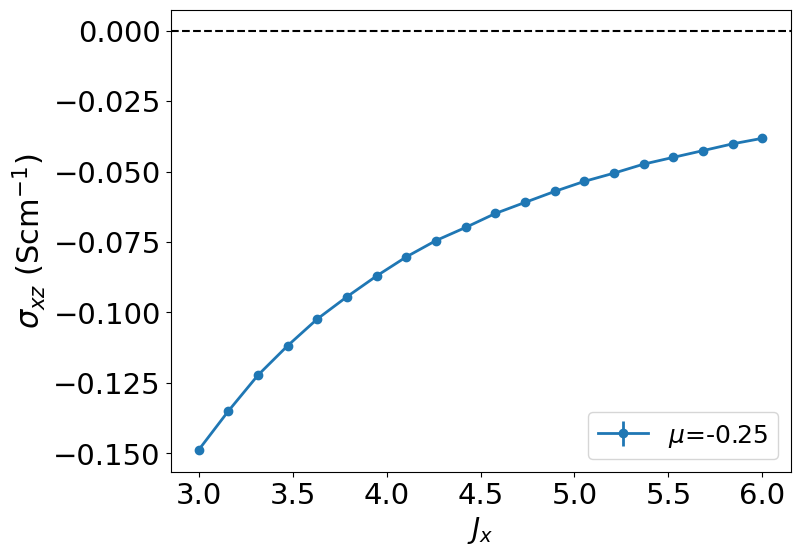

In [139]:
fig_total, axs_total = plt.subplots(figsize=(8,6))
scale_factor_tick = 0.035
scale_factor_label = 0.055
fig_total_width, fig_total_height = fig_total.get_size_inches()

label_size= min(fig_total_width, fig_total_height)*scale_factor_label*100
tick_size= min(fig_total_width, fig_total_height)*scale_factor_tick*100

axs_total.tick_params(axis='both', which='major', labelsize=tick_size)
axs_total.tick_params(axis='both', which='minor', labelsize=tick_size/1.5)
axs_total.xaxis.label.set_size(label_size)
axs_total.yaxis.label.set_size(label_size)

#The plots
axs_total.errorbar(JRUNS,unitfactor*grand_TESTresult[0],yerr=abs(unitfactor)*grand_TESTstd[0], fmt='o-', label=fr'$\mu$={MURUNS[0]}', linewidth=2)
# axs_total.errorbar(JRUNS,unitfactor*grand_TESTresult[1],yerr=abs(unitfactor)*grand_TESTstd[1], fmt='o-', label=fr'$\mu$={MURUNS[1]}')
# axs_total.errorbar(JRUNS,unitfactor*grand_TESTresult[2],yerr=abs(unitfactor)*grand_TESTstd[2], fmt='o-', label=fr'$\mu$={MURUNS[2]}')

#Below: only lmx
axs_total.axhline(0, color='black', linestyle='dashed')


axs_total.set_xlabel(r'$J_x$', fontsize=20)
axs_total.set_ylabel(r'$\sigma_{xz}$ (Scm$^{-1}$)', fontsize=22)
axs_total.legend(fontsize=18)

# plt.savefig(".pdf", format="pdf", bbox_inches="tight")

plt.show()

Now running another interval, from 1.15 to 1.48 for J.
If the µ-J grid was anything to go by, the conductivity should cross 0 exactly when we w get the chemical potential between the bands. I believe that this happns at 1.5 for µ=-0.25.

This conductivity doesn't show that at all. Now checking the lower values before the crossing. Afterwards, run for higher values of 1.8 to 2.5 or so, and check if it goes to 0 later on.

What does this mean? If our conductivity doesn't go to 0 when the chemical potential is between the bands, then there is some sort of connection between the upper and lower bands, no?

Also: doublecheck visually with µ=-0.25 and J $\approx$ 1.5 to see if µ really IS between the bands

I think what is happening:
I see that mu is between the bands IN THAT REGION of the BZ that I examine. I haven't been able to examine the entire BZ.
Therefore, there might still be intersections between mu and the bands in other regions.

My goal now is to keep running for µ=-0.25 and see when it goes to 0. Once done, see if I can create a phase grid that encompasses the entire BZ.
- Would require a meshgrid in the kx,y,z directions with quite a lot of points. But I don't think it should be a problem.
- another issue: My code for band structure diagonalizes the entire Hamiltonian. But this code that I have run for J only finds the AHC for the lowest order.
- Stupid... I guess I should run for µ=-0.25 for the full order...

Text(0, 0.5, '$\\sigma_{xz}$ (Scm$^{-1}$)')

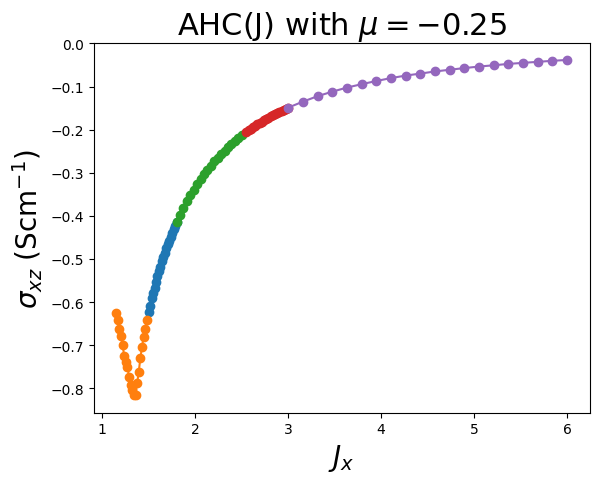

In [176]:
import pandas as pd
Jlimit_df = pd.read_csv("AHC(J,mu=-025)_N50.0k.csv")
Jlimit_df_2 = pd.read_csv("AHC(J,mu=-025)_N50.0k_2.csv")
Jlimit_df_3 = pd.read_csv("AHC(J,mu=-025)_N50.0k_3.csv")
Jlimit_df_4 = pd.read_csv("AHC(J,mu=-025)_N50.0k_4.csv")
Jlimit_df_5 = pd.read_csv("AHC(J,mu=-025)_N50.0k_5.csv")



plt.errorbar(Jlimit_df['j'],unitfactor*Jlimit_df['result'],yerr=abs(unitfactor)*Jlimit_df['std_dev'], fmt='o-',label='run1')
plt.errorbar(Jlimit_df_2['j'],unitfactor*Jlimit_df_2['result'],yerr=abs(unitfactor)*Jlimit_df_2['std_dev'],fmt='o-', label='run2')
plt.errorbar(Jlimit_df_3['j'],unitfactor*Jlimit_df_3['result'],yerr=abs(unitfactor)*Jlimit_df_3['std_dev'], fmt='o-',label='run3')
plt.errorbar(Jlimit_df_4['j'],unitfactor*Jlimit_df_4['result'],yerr=abs(unitfactor)*Jlimit_df_4['std_dev'], fmt='o-',label='run4')
plt.errorbar(Jlimit_df_5['j'],unitfactor*Jlimit_df_5['result'],yerr=abs(unitfactor)*Jlimit_df_5['std_dev'], fmt='o-',label='run5')

plt.title(r'AHC(J) with $\mu=-0.25$', fontsize=22)
plt.xlabel(r'$J_x$', fontsize=20)
plt.ylabel(r'$\sigma_{xz}$ (Scm$^{-1}$)', fontsize=20)
#plt.legend()